Text(1.0, 0.03, 'Accept')

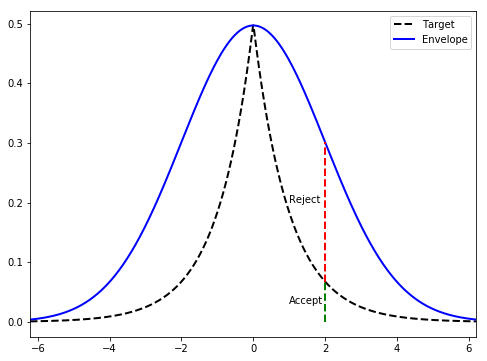

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Target = double gamma distribution
# Envelope = normal distribution 
dg = stats.dgamma(a=1)
norm = stats.norm(loc=0, scale=2)

# Generate samples for PDF
x = np.linspace(min(dg.ppf(0.001), norm.ppf(0.001)), 
                max(dg.ppf(0.999), norm.ppf(0.999)), 1000)
dg_samples = dg.pdf(x)
norm_samples = norm.pdf(x)

# Find scaling constant for envelope 
M = max(dg_samples / norm_samples)

# Plot
df = pd.DataFrame({'Target': dg_samples, 'Envelope': M * norm_samples}, index=x)
ax = df.plot(style=['--', '-'], color=['black', 'blue'], 
             figsize=(8,6), linewidth=2.0)
ax.plot((2, 2), (0, dg.pdf(2)), 'g--', linewidth=2.0)
ax.plot((2, 2), (dg.pdf(2), M * norm.pdf(2)), 'r--', linewidth=2.0)
ax.text(1.0, 0.20, 'Reject')
ax.text(1.0, 0.03, 'Accept')

/Users/kendranoneman/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


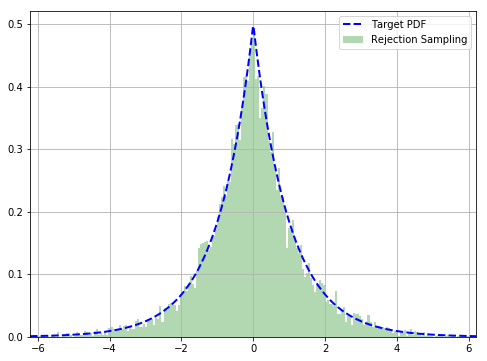

In [3]:
def rejection_sampling():
    while True:
        # Re-use global parameters from above
        x = np.random.normal(0, 2)
        envelope = M * norm.pdf(x)
        p = np.random.uniform(0, envelope)
        if p < dg.pdf(x):
            return x

# Generation samples from rejection sampling algorithm
samples = [rejection_sampling() for x in range(10000)]

# Plot Histogram vs. Target PDF
df['Target'].plot(color='blue', style='--', figsize=(8,6), linewidth=2.0)
pd.Series(samples).hist(bins=300, normed=True, color='green', 
                        alpha=0.3, linewidth=0.0)
plt.legend(['Target PDF', 'Rejection Sampling'])